In [1]:
from numpy import *
import matplotlib.pyplot as plt
%matplotlib inline  

from scipy.optimize import curve_fit

## 데이터 셋 만들기

In [2]:
random.seed(0)
x=linspace(-2*pi,2*pi,100)
y=sin(x) + random.normal(0,0.3,len(x))
y_sin = sin(x)

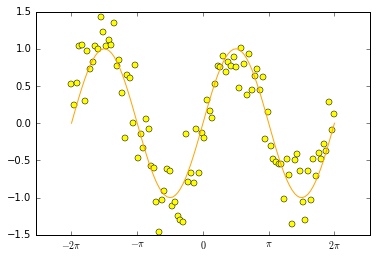

In [3]:
plt.plot(x,y,'o', color='yellow')
plt.plot(x,y_sin,color='orange')
plt.xticks([-2*pi,-pi,0,pi,2*pi], [r'$-2\pi$',r'$-\pi$',r'$0$',r'$\pi$',r'$2\pi$'])
plt.show()

## 다항 회귀분석 (5차)

In [4]:
z = polyfit(x,y,5)
p = poly1d(z)
yp = p(x)

In [5]:
z

array([  1.34888816e-03,   3.08586454e-05,  -6.64021506e-02,
         8.77586173e-03,   5.86308558e-01,  -1.09886506e-01])

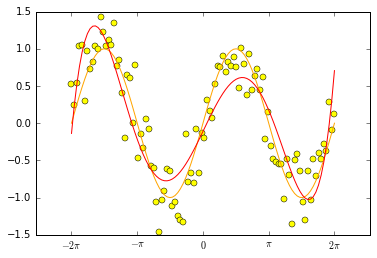

In [6]:
plt.plot(x,y,'o', color='yellow')
plt.plot(x,y_sin,color='orange')
plt.plot(x,yp, color='red')
plt.xticks([-2*pi,-pi,0,pi,2*pi], [r'$-2\pi$',r'$-\pi$',r'$0$',r'$\pi$',r'$2\pi$'])
plt.show()

## Cubic spline

In [7]:
def h(x,keusi):
    return array([max((xi-(keusi))**3, 0) for xi in x])

In [8]:
def func(x, b0, b1, b2, b3, b4, b5, b6):
    x_qua = x**2
    x_cub = x**3
    h1 = h(x,-pi)
    h2 = h(x,0)
    h3 = h(x,pi)
    return b0 + b1*x + b2*x_qua + b3*x_cub + b4*h1 +b5*h2 + b6*h3

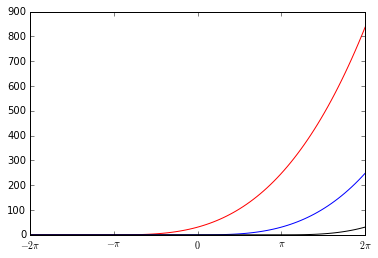

In [9]:
h1 = h(x,-pi)
h2 = h(x,0)
h3 = h(x,pi)
plt.plot(x,h1,color='red')
plt.plot(x,h2,color='blue')
plt.plot(x,h3,color='black')
plt.xticks([-2*pi,-pi,0,pi,2*pi], [r'$-2\pi$',r'$-\pi$',r'$0$',r'$\pi$',r'$2\pi$'])
plt.plot()
plt.show()

In [10]:
popt, pcov = curve_fit(func, x, y)

In [11]:
popt

array([  7.24693384e+00,   7.52930947e+00,   2.25606103e+00,
         1.97748500e-01,  -2.37616022e-01,  -3.44789109e-03,
         2.50195817e-01])

In [12]:
y_new = func(x, popt[0], popt[1], popt[2], popt[3], popt[4], popt[5], popt[6])

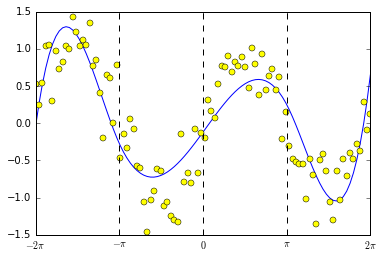

In [13]:
plt.plot(x,y_new,color='blue')
plt.plot(x,y,'o', color='yellow')
for j in range(3):
    plt.plot([-pi+(pi*j) for i in range(5)],linspace(-1.5,1.5,5), '--',color='black')
plt.xticks([-2*pi,-pi,0,pi,2*pi], [r'$-2\pi$',r'$-\pi$',r'$0$',r'$\pi$',r'$2\pi$'])
plt.plot()
plt.show()

## 그래프로 비교
sin vs 다항회귀 vs cubic spline

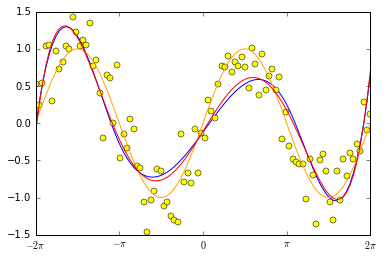

In [14]:
plt.plot(x,y_new,color='blue') ##cubic spline
plt.plot(x,y,'o', color='yellow')
plt.plot(x,y_sin,color='orange')
plt.plot(x,yp, color='red')
plt.xticks([-2*pi,-pi,0,pi,2*pi], [r'$-2\pi$',r'$-\pi$',r'$0$',r'$\pi$',r'$2\pi$'])
plt.plot()
plt.show()